In [33]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [34]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [35]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [36]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [37]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [38]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [39]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [40]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [41]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(f"The most recent date in the database is {recent_date}")

The most recent date in the database is ('2017-08-23',)


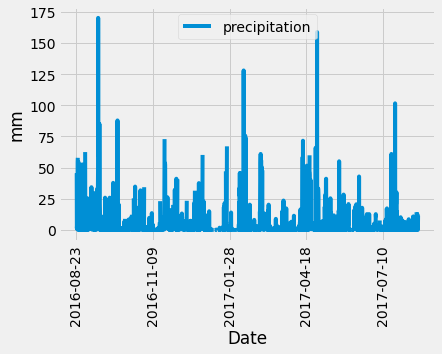

In [42]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
twelve_months_prior = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precipitation = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= twelve_months_prior).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_df = pd.DataFrame(precipitation, columns=["Date", "precipitation"])
precipitation_df.set_index('Date', inplace=True)

# Sort the dataframe by date
precipitation_df = precipitation_df.sort_values("Date", ascending=True)

# Use Pandas Plotting to plot the data
precipitation_chart = precipitation_df.plot(rot=90)
precipitation_chart.set_ylabel("mm");


In [43]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df.describe()

,precipitation
count,2021.000000
mean,4.505888
std,11.713487
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [44]:
# Design a query to calculate the total number stations in the dataset

# Couting the number of distinct stations in the dataset
total_number_stations = session.query(Station.station).distinct().count()
print(f"The total number of stations in the dataset is {total_number_stations}")

The total number of stations in the dataset is 9


In [45]:
# Design a query to find the most active stations (i.e. what stations have the most rows?).  List the stations and the counts in descending order.

# Finding out the number of rows each station has, grouping the results by station, and sorting the results in descending order
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [46]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == "USC00519281").all()
most_active_station


[(12.2, 29.4, 22.03582251082252)]

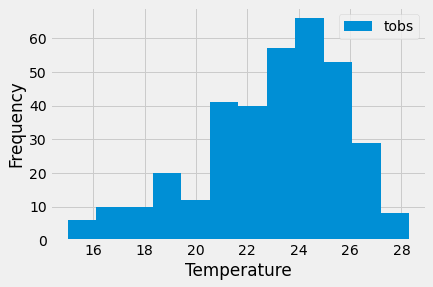

In [47]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# Noting the most active station
active_station = "USC00519281"

# Perform a query to retrieve the precipitation scores for this station for data in the last 12 months of the dataset
waihee_station_temp = session.query(Measurement.date, Measurement.tobs, Measurement.station).\
    filter(Measurement.date >= twelve_months_prior).\
    filter(Measurement.station == active_station).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
waihee_station_temp_df = pd.DataFrame(waihee_station_temp, columns=["date", "temperature", "station"])
waihee_station_temp_df.set_index('date', inplace=True)
waihee_station_temp_df.head()

# Plot a histogram
plt.hist(waihee_station_temp_df['temperature'], bins=12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend(['tobs'], loc=1)
plt.show()


# Close session

In [48]:
# Close Session
session.close()